In [1]:
try:
    if LOADED: # type: ignore
        pass
except:
    import os
    from pathlib import Path
    os.chdir(Path(os.getcwd()).resolve().parent.as_posix())
finally:
    print(f"{os.getcwd()=}")
LOADED = True

os.getcwd()='/home/deck/Documents/GitHub/jabutiles'


In [2]:
from jabutiles import Tile, Mask
from jabutiles.tilegen import TileGen

# Procedural Tile Generation Showdown

In [3]:
SCALE = 4

## Curbstone on Grass

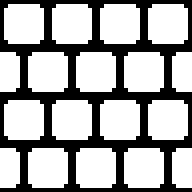

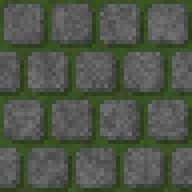

In [4]:
SIZE = 48
GAP_SIZE = 2
BRICK_SIZE = (SIZE//4-GAP_SIZE, SIZE//4-GAP_SIZE)
EDGE_WIDTH = 1
SHADE_FORCE = 0.80

shape_mask = TileGen.gen_ort_mask(SIZE)
pattern_mask = TileGen.gen_brick_pattern_mask(
    shape_mask.size,
    BRICK_SIZE,
    GAP_SIZE,
    EDGE_WIDTH,
).offset((-1, -1))
pattern_mask.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'grass').color(SHADE_FORCE)
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'stone.raw')

shaded_base = texture_tile1.shade(pattern_mask, (+1, +1), SHADE_FORCE, False)
shaded_head = texture_tile2.shade(pattern_mask, (-1, -1), SHADE_FORCE, True)

final = shaded_base.overlay(shaded_head, pattern_mask)
final.display(SCALE)
# final.save("examples/stone_road_on_grass.png")

## Plank brigde over Water

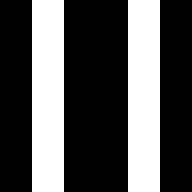

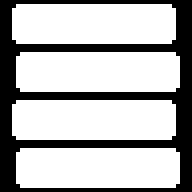

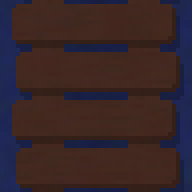

In [5]:
SIZE = (48, 48)
PLANK_SIZE = (SIZE[0]-7, SIZE[1]//5+1)
GAP_SIZE = (5, 2)
EDGE_WIDTH = 1
SHADE_FORCE = 0.80

# base_mask = TileGen.gen_ort_mask(SIZE)
head_mask1 = TileGen.gen_line_draw_mask(SIZE, [((SIZE[0]//4-0.5, 0), (SIZE[0]//4-0.5, SIZE[1]), 8)])
head_mask1 = Mask.merge_masks([head_mask1, head_mask1.mirror('y')])
head_mask2 = TileGen.gen_brick_pattern_mask(SIZE, PLANK_SIZE, GAP_SIZE, EDGE_WIDTH, 1).offset((-2, -1), False)
head_mask1_2 = Mask.merge_masks([head_mask1, head_mask2])

head_mask1.display(SCALE)
head_mask2.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(SIZE, 'water').color(0.75)
texture_tile2 = TileGen.gen_texture_tile(SIZE, 'wood')

base_tile =  texture_tile1.shade(head_mask1_2, (+1, +2), SHADE_FORCE, False)
head_tile1 = texture_tile2.shade(head_mask2, (-1, -1), SHADE_FORCE, True)
head_tile2 = texture_tile2.rotate(90).shade(head_mask2, (-1, -1), SHADE_FORCE, True)

final = Tile.merge_tiles(
    (base_tile, None),
    (head_tile1, head_mask1),
    (head_tile2, head_mask2),
)

final.display(SCALE)
# final.save("examples/wood_bridge_over_water.png")

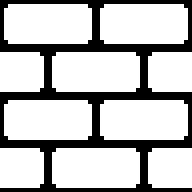

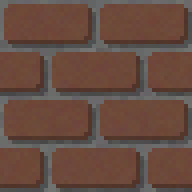

In [6]:
SIZE = 48
GAP_SIZE = 2
BRICK_SIZE = (SIZE//2-GAP_SIZE, SIZE//4-GAP_SIZE)
EDGE_WIDTH = 1
SHADE_FORCE = 0.75

shape_mask = TileGen.gen_ort_mask(SIZE)
pattern_mask = TileGen.gen_brick_pattern_mask(shape_mask.size, BRICK_SIZE, GAP_SIZE, EDGE_WIDTH).offset((-1, -1))
pattern_mask.display(SCALE)

texture_tile1 = TileGen.gen_texture_tile(shape_mask.size, 'stone').contrast(2)
texture_tile2 = TileGen.gen_texture_tile(shape_mask.size, 'clay').color(0.9)

shaded_base = texture_tile1.shade(pattern_mask, (+1, +1), SHADE_FORCE, False)
shaded_head = texture_tile2.shade(pattern_mask, (-1, -1), SHADE_FORCE, True)

combined = shaded_base.overlay(shaded_head, pattern_mask)
combined.display(SCALE)
# combined.save("examples/clay_brick_wall.png")

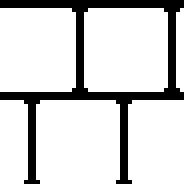

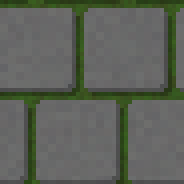

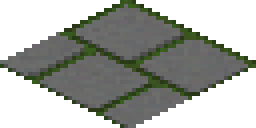

final.size=(64, 32)


In [7]:
S = 46
SIZE = (S, S)
PAD = 4
GAP_SIZE = 2
BRICK_SIZE = (S//2-GAP_SIZE, S//2-GAP_SIZE)
EDGE_WIDTH = 1
SHADE_FORCE = 0.75

pattern_mask = TileGen.gen_brick_pattern_mask(SIZE, BRICK_SIZE, GAP_SIZE, EDGE_WIDTH).offset((-PAD, 0))
pattern_mask.display(SCALE)

texture1 = TileGen.gen_texture_tile(SIZE, 'grass')
texture2 = TileGen.gen_texture_tile(SIZE, 'stone')

shaded_base = texture1.shade(pattern_mask, (+1, +1), SHADE_FORCE, False)
shaded_head = texture2.shade(pattern_mask, (-1, -1), SHADE_FORCE, True)

combined = shaded_base.overlay(shaded_head, pattern_mask)
combined.display(SCALE)

from jabutiles.convert import convert_ort2iso
final = convert_ort2iso(combined, PAD)
final.display(SCALE)

print(f"{final.size=}")
# final.save("examples/isometric_stone_road.png")

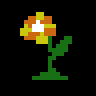

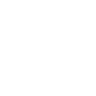

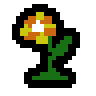

In [8]:
tile = Tile("tests/samples/addborder.png")
tile.display(SCALE)
tile.outline(1, "white", combine=False).display(SCALE)
tile.outline(2, "black", combine=True).display(SCALE)

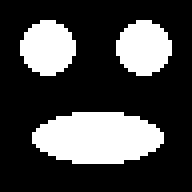

In [9]:
TileGen.gen_blobs_mask(
    (48, 48), [
        ((12, 12), 6.5),     # left eye
        ((36, 12), 6.5),     # right eye
        ((24, 34), (16, 6)) # mouth
    ]
).display(SCALE)

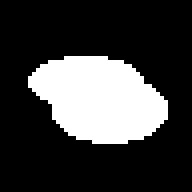

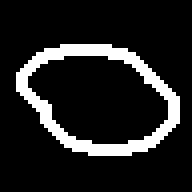

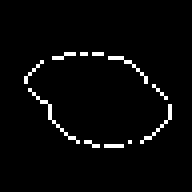

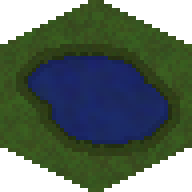

In [10]:
SIZE = (48, 48)
SHADE_FORCE = 0.9

base_mask = TileGen.gen_ort_mask(SIZE)
lakemask = TileGen.gen_blobs_mask(SIZE, [
    ((21, 20), (14, 6)), ((27, 27), (14, 8)),
])
lakemask.display(SCALE)

edgemask1 = lakemask.cutout(lakemask).outline(3, "white", False)
edgemask2 = lakemask.cutout(lakemask).outline(1, "white", False, 0.6)
edgemask1.display(SCALE)
edgemask2.display(SCALE)

texture1 = TileGen.gen_texture_tile(lakemask.size, "grass")
texture2 = TileGen.gen_texture_tile(lakemask.size, "water")
texture3 = TileGen.gen_texture_tile(lakemask.size, "grass.wet")#.brightness(SHADE_FORCE)

texture2 = texture2.shade(lakemask, (+1, +1), SHADE_FORCE, inverted=True)
texture2 = texture2.shade(lakemask, (-1, -1), SHADE_FORCE, inverted=True)

final = Tile.merge_tiles(
    (texture1, None),
    (texture2, lakemask),
    (texture3, edgemask1),
    (texture3.brightness(0.75), edgemask2),
    (None, TileGen.gen_hex_mask(SIZE, 'point')),
)
final.display(SCALE)
# final.save("examples/lake_on_grass.png")

hex_mask.size=(36, 32)


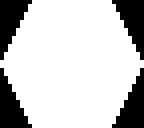

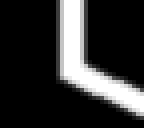

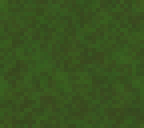

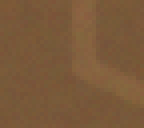

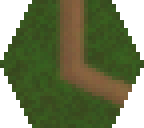

In [11]:
SIZE = 36
SHADE_FORCE = 0.9

hex_mask = TileGen.gen_hex_mask(SIZE, 'flat')
print(f"{hex_mask.size=}")
hex_mask.display(SCALE)

pathmask = TileGen.gen_line_draw_mask(hex_mask.size,
    [
        ((17, 0 ), (17, 17), 6),
        ((16, 16), (37, 26), 6),
    ]
).smooth(1, False)
pathmask.display(SCALE)

texture1 = TileGen.gen_texture_tile(hex_mask.size, "grass")
texture2 = TileGen.gen_texture_tile(hex_mask.size, "dirt").brightness(SHADE_FORCE)
texture2 = texture2.shade(pathmask, (3, -1), SHADE_FORCE, True, False)

texture1.display(SCALE)
texture2.display(SCALE)

final = (texture1
    .overlay(texture2, pathmask)
    .cutout(hex_mask)
)
final.display(SCALE)
# final.save("examples/dirt_road_on_grass.png")